In [2]:
import pandas as pd
ds = pd.read_csv('mental_health_feelings.csv')

In [3]:
ds

,data,class
0,I am content with my life.,positive
1,I feel a sense of accomplishment.,positive
2,I am not enjoying my work.,negative
3,I am so excited about the future.,positive
4,I feel negative and unmotivated.,negative
...,...,...
12995,I am anxious about the future.,negative
12996,I am indifferent about my goals.,negative
12997,I am so excited about the future.,positive
12998,I feel positive and motivated.,positive


In [4]:
print(ds.head())


                                data     class
0         I am content with my life.  positive
1  I feel a sense of accomplishment.  positive
2         I am not enjoying my work.  negative
3  I am so excited about the future.  positive
4   I feel negative and unmotivated.  negative


In [5]:
#data preprosessing steps
# Importing libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
#import emoji

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize necessary tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove emojis
   # text = emoji.replace_emoji(text, replace='')
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Apply preprocessing to the text column
ds['data'] = ds['data'].apply(preprocess_text)
ds['class'] = ds['class'].apply(preprocess_text)

# Display the processed text
print(ds)

                       data  class
0              content life  posit
1      feel sens accomplish  posit
2                enjoy work    neg
3               excit futur  posit
4          feel neg unmotiv    neg
...                     ...    ...
12995          anxiou futur    neg
12996         indiffer goal    neg
12997           excit futur  posit
12998      feel posit motiv  posit
12999    feel empti joyless    neg

[13000 rows x 2 columns]


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import nltk
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import string
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text data
X = tfidf_vectorizer.fit_transform(ds['data'])
y = ds['class']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize and train the Logistic Regression model
#model = LogisticRegression()
#model.fit(X_train, y_train)           #this is logistic regression

#model = SVC(kernel='linear', C=1.0, random_state=42)
#model.fit(X_train, y_train)          #this is SVC

#model = KNeighborsClassifier(n_neighbors=3)
#model.fit(X_train, y_train)                #this is KNN

#model = MultinomialNB()
#model.fit(X_train, y_train)         # This is Navie bayes

model = DecisionTreeClassifier()
model.fit(X_train, y_train)                     #this id decision tree

#model = RandomForestClassifier()
#model.fit(X_train, y_train)                   #this is Random Forest

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


# Example assuming `model` is already trained and `y_pred` is predicted values
y_true = y_test  # Replace with your actual y_true values
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, pos_label='posit')
recall = recall_score(y_true, y_pred, pos_label='posit')
f1 = f1_score(y_true, y_pred, pos_label='posit')

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')



Accuracy: 0.9661538461538461
Precision: 1.0
Recall: 0.9331814730447988
F1-score: 0.9654359780047133


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Function to train the model and make predictions
def predict_dataset():
    # Load the dataset
    df = pd.read_csv('mental_health_feelings.csv')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df['data'], df['class'], test_size=0.2, random_state=42)

    # Vectorize the text data
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Train a classifier
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    # Function to predict the feeling
    def predict_feeling(text):
        text_vec = tfidf_vectorizer.transform([text])
        prediction = model.predict(text_vec)
        return prediction[0]

    # Generate predictions for the dataset
    df['predicted_class'] = df['data'].apply(predict_feeling)

    return df

# Call the function and get the updated DataFrame
predicted_df = predict_dataset()
print(predicted_df.head(30))


                                              data     class predicted_class
0                       I am content with my life.  positive        positive
1                I feel a sense of accomplishment.  positive        positive
2                       I am not enjoying my work.  negative        negative
3                I am so excited about the future.  positive        positive
4                 I feel negative and unmotivated.  negative        negative
5                I feel a sense of accomplishment.  positive        positive
6                 I feel negative and unmotivated.  negative        negative
7               I am uncertain about my decisions.  negative        negative
8                  I am overwhelmed by everything.  negative        negative
9                     I am happy with my progress.  positive        positive
10                 I am dissatisfied with my life.  negative        negative
11    I feel exhausted and unprepared for the day.  negative        negative

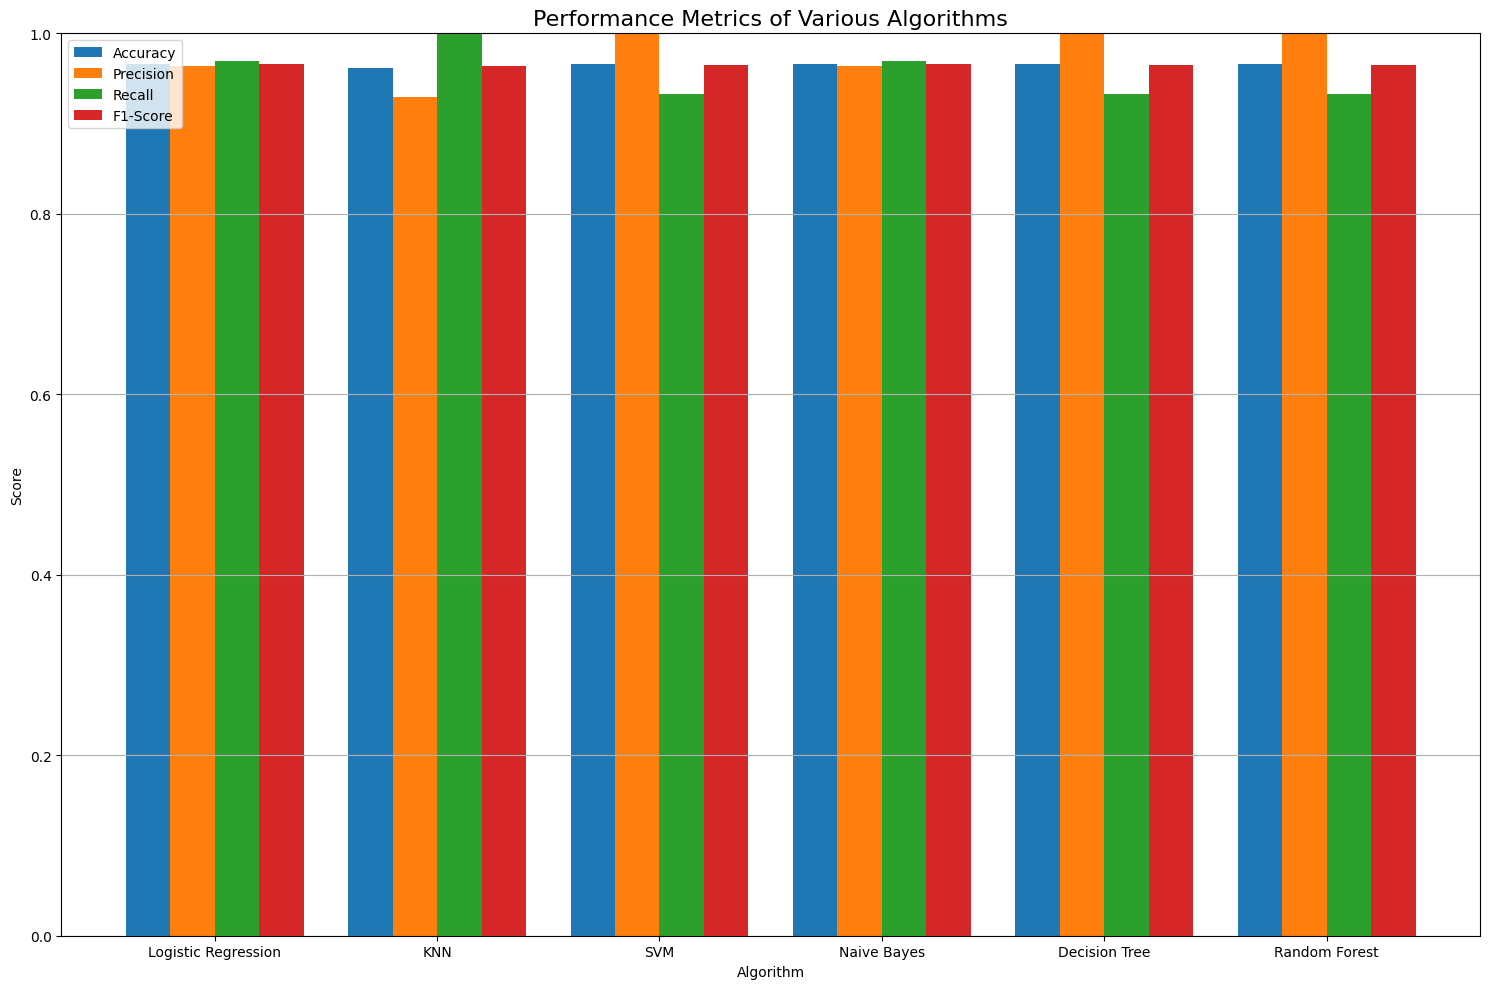

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear', C=1.0, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Lists to store results
results = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train, predict and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='posit')
    recall = recall_score(y_test, y_pred, pos_label='posit')
    f1 = f1_score(y_test, y_pred, pos_label='posit')
    
    results['Algorithm'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot the results as a grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))

# Set the position of the bars on the x-axis
bar_width = 0.2
positions = list(range(len(results_df)))

# Create bars
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    plt.bar(
        [p + bar_width * i for p in positions], 
        results_df[metric], 
        width=bar_width, 
        label=metric
    )

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * bar_width for p in positions])

# Set the labels and title
ax.set_xticklabels(results_df['Algorithm'])
ax.set_title('Performance Metrics of Various Algorithms', fontsize=16)
ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_xlabel('Algorithm')

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


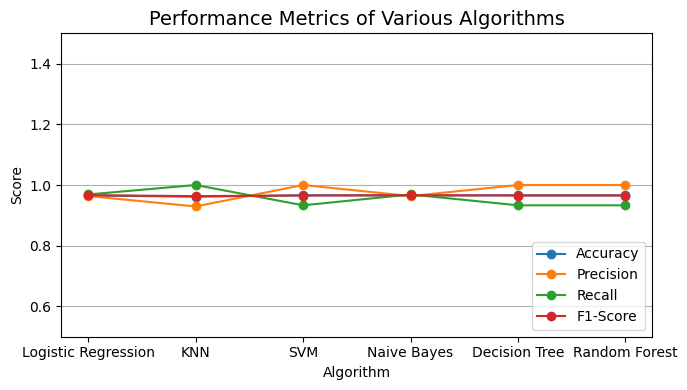

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear', C=1.0, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Lists to store results
results = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train, predict and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='posit')
    recall = recall_score(y_test, y_pred, pos_label='posit')
    f1 = f1_score(y_test, y_pred, pos_label='posit')
    
    results['Algorithm'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot the results using a line graph
fig, ax = plt.subplots(figsize=(7, 4))

# Plot each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    ax.plot(results_df['Algorithm'], results_df[metric], marker='o', label=metric)

# Set the labels and title
ax.set_title('Performance Metrics of Various Algorithms', fontsize=14)
ax.set_ylim([0.5, 1.5])
ax.set_ylabel('Score')
ax.set_xlabel('Algorithm')

# Adding the legend and showing the plot
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
